In [1]:

import numpy as np
from skimage import io,  util
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray


One sample of MassProp in pnpy and one sample of MassProp in pnpy

In [2]:
# test_image_Mp = np.load('/Users/siravani/Documents/LC-MSRealData/\
# Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
# TOPPAS_out/003-FileConverter-out/images/\
# 50ugserum_MPrep_INCL_5ul240run_Subj2_inj1-s1.mzML.npy')

#  test_image_noMp = np.load('/Users/siravani/Documents/LC-MSRealData/\
# # Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
# # TOPPAS_out/003-FileConverter-out/images/\
# # 50ugserum_noMP_INCL_5ul240run_Subj2_inj1-s1.mzML.npy')

Mean images in npy format

In [3]:
test_image_Mp =np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/003-FileConverter-out/\
images_mz300-1300_RT140_rate_1/mean_spike_in.npy')

test_image_noMp = np.load('/Users/siravani/Documents/\
LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/\
003-FileConverter-out/images_mz300-1300_RT140_rate_1/mean_spike_no.npy')


In [135]:
np.shape(test_image_Mp)

(1142, 1000)

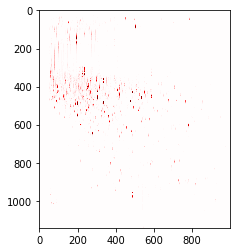

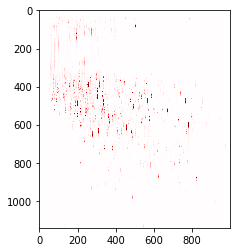

In [4]:
plt.figure()
plt.imshow(test_image_Mp,cmap="seismic", clim=(-1000,1000))
plt.figure()
plt.imshow(test_image_noMp,cmap="seismic", clim=(-1000,1000))


interpretation of an image in the mp group abd no-mp on the network that has been trained 
on the numpy matrix

In [5]:
# Interpretation_Mp_npy = np.load('/Users/siravani/Documents/LC-MSRealData/\
# Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/\
# 003-FileConverter-out/images/costomizeImages-2-npy-scratch-train-interpretation/\
# lrp.z50ugserum_MPrep_INCL_5ul240run_Subj2_inj1-s1.mzML.npy.npy')

# Interpretation_Mp_npy = np.abs(Interpretation_Mp_npy)


# Interpretation_noMp_npy = np.load('/Users/siravani/Documents/LC-MSRealData/\
# Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/\
# 003-FileConverter-out/images/costomizeImages-2-npy-scratch-train-interpretation/\
# lrp.z50ugserum_noMP_INCL_5ul240run_Subj2_inj1-s1.mzML.npy.npy')




mean of the interpretation of the images in the mp group on the network that has been trained on the numpy matrix

In [6]:
# import os
# filedir = '/Users/siravani/Documents/LC-MSRealData/\
# Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/\
# 003-FileConverter-out/images/costomizeImages-2-npy-scratch-train-interpretation/'
# Interpretation_Mp_npy=0
# Interpretation_noMp_npy=0
# file_list = os.listdir(filedir)
# for file in file_list:
#     if (file.endswith('.npy')) and ('_MPrep' in file):
#         Intr = np.load(os.path.join(filedir,file))
#         Interpretation_Mp_npy += Intr/5
#     elif (file.endswith('.npy')) and ('_noMP' in file):
#         Intr = np.load(os.path.join(filedir,file))
#         Interpretation_noMp_npy += Intr/5

# Interpretation_Mp_npy = np.abs(Interpretation_Mp_npy)
# # Interpretation_noMp_npy = np.abs(Interpretation_noMp_npy)
# # Interpretation_Mp_npy = Interpretation_Mp_npy +Interpretation_noMp_npy

Interpretation on the mean 

In [136]:
Interpretation_Mp_npy= np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140_rate_1/\
costomizeImages-4-npy-scratch-train-interpretation/\
Interpretation-of-mean-nodropout/lrp.zmean_spike_in.npy.npy')
Interpretation_Mp_npy[np.where(Interpretation_Mp_npy<=0)]=0
Interpretation_Mp_npy = np.abs(Interpretation_Mp_npy)


Interpretation_noMp_npy=np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140_rate_1/\
costomizeImages-4-npy-scratch-train-interpretation/\
Interpretation-of-mean-nodropout/lrp.zmean_spike_no.npy.npy')
Interpretation_noMp_npy[np.where(Interpretation_noMp_npy>=0)]=0
Interpretation_noMp_npy = np.abs(Interpretation_noMp_npy)

# Interpretation_Mp_npy=Interpretation_Mp_npy+Interpretation_noMp_npy



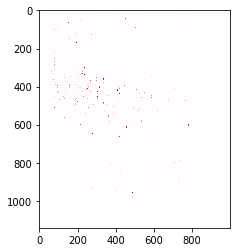

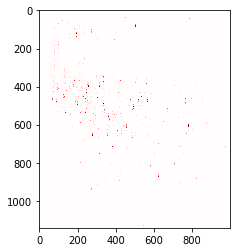

In [137]:
plt.figure()
plt.imshow(Interpretation_Mp_npy,cmap="seismic", clim=(-0.1, 0.1))

plt.figure()
plt.imshow(Interpretation_noMp_npy,cmap="seismic", clim=(-0.1, 0.1))


In [138]:

indices = []

data = np.copy(Interpretation_Mp_npy)
for i in range(40000):
    ind = np.unravel_index(np.argmax(data, axis=None), data.shape) 
    if (ind[0]>13 and ind[1]>2 and data[ind]!=0 and test_image_Mp[ind]>2):
        data[ind[0]-13:ind[0]+13, ind[1]-1:ind[1]+1] =0
        indices.append(ind)
    else:
        data[ind[0], ind[1]] =0
np.shape(indices)
        

(8751, 2)

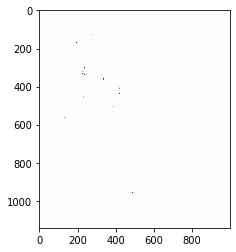

In [189]:
data = np.copy(test_image_Mp)
# data = np.copy(Interpretation_22pep)

Interpretation_importance = np.zeros((test_image_Mp.shape))
indices_ = indices_with_ttest#_improved
# for i in range(795):
for i in range(np.shape(indices_)[0]):
    if (indices_[i][0]>13 and indices_[i][1]>2):
        Interpretation_importance [ indices_[i][0]-13:indices_[i][0]+13, indices_[i][1]-2:indices_[i][1]+2] = \
        Interpretation_Mp_npy[indices_[i][0]-13:indices_[i][0]+13, indices_[i][1]-2:indices_[i][1]+2]
    else:
        Interpretation_importance [ indices_[i][0], indices_[i][1]] = \
        Interpretation_Mp_npy[indices_[i][0], indices_[i][1] ]
       
    
# plt.imshow(Interpretation_importance, cmap="seismic", clim=(-0.1, 0.1))
plt.figure()
plt.imshow(Interpretation_importance, cmap="seismic", clim=(-0.1, 0.1))


In [190]:
def round_of_rating(number,rate):
    return round(number * rate) / rate
def plot_spike_contrast(ts,te, mz, rate, ylim):

    ts=int(ts*60)
    te = int(te*60)
    
    mz = mz
    rate = rate
#     plt.figure()
    fig , (ax1,ax2) = plt.subplots(1,2, figsize = ( 9,3))
    ax1.set_title('mz='+str(mz)+ '(MP)')
    ax1.set(xlabel='RT', ylabel= 'Intensity')
#     ax1.ylabel('Intensity')
    ax1.set_ylim(top=ylim)
    
    xmin= int(np.floor( ts/7 ))
    xmax= int(np.floor( te/7 ))
    ax1.plot(range(xmin,xmax),\
             10000*Interpretation_importance[xmin:xmax,int(round_of_rating(mz,rate)*rate)-300], 'blue')
    ax1.plot(range(xmin,xmax),\
             test_image_Mp[xmin:xmax,int(round_of_rating(mz,rate)*rate)-300], 'darkred')

#     plt.figure()
    
    
    ax2.set_title('mz='+str(mz)+ '(noMP)')
    ax2.set(xlabel='RT', ylabel= 'Intensity')
#     ax2.ylabel('Intensity')
    ax2.set_ylim(top=ylim)
    ax2.plot(range(xmin,xmax),\
             10000*Interpretation_noMp_npy[xmin:xmax,int(round_of_rating(mz,rate)*rate)-300], 'blue')
    ax2.plot(range(xmin,xmax),\
             test_image_noMp[xmin:xmax,int(round_of_rating(mz,rate)*rate)-300],'darkred')



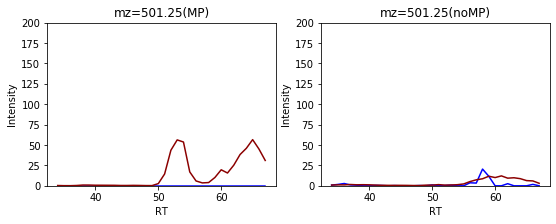

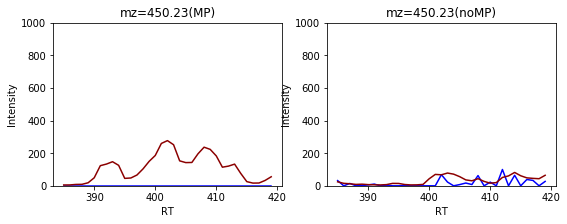

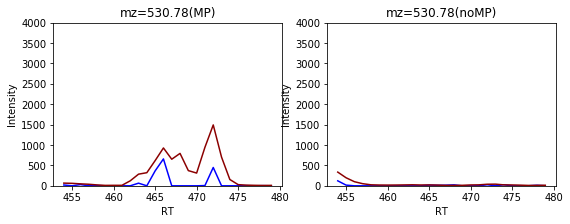

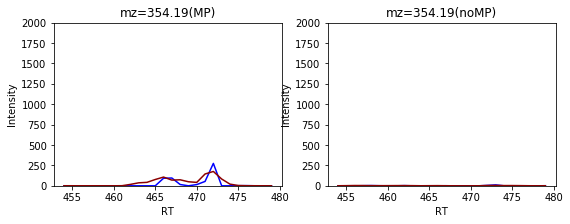

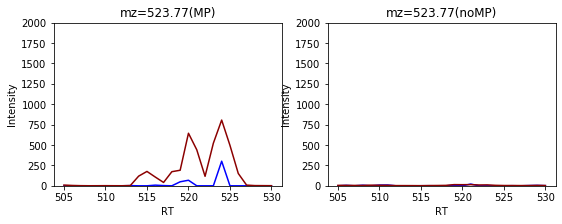

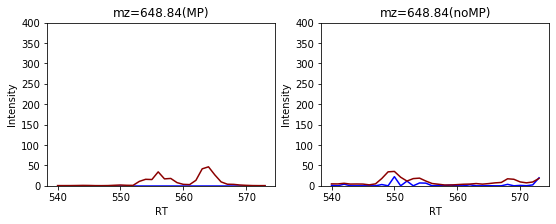

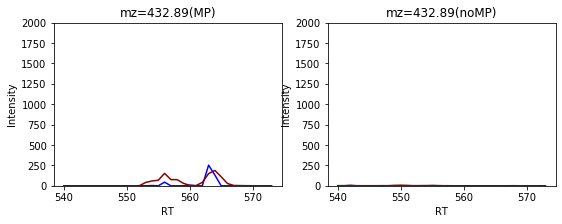

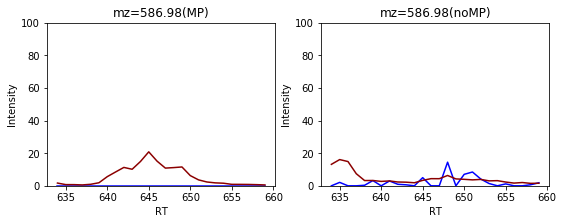

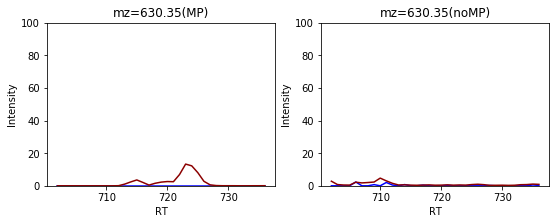

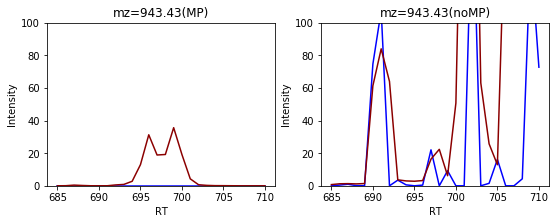

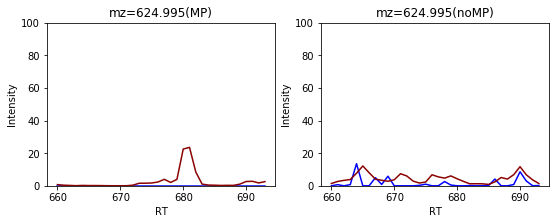

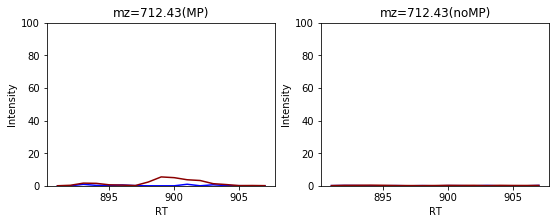

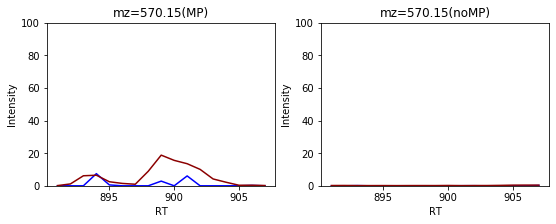

In [191]:
rate=1
plot_spike_contrast(ts=4, te=8, mz=501.25, rate=rate , ylim= 200)
plot_spike_contrast(ts=45, te=49, mz=450.23, rate=rate, ylim= 1000)
plot_spike_contrast(ts=53, te=56, mz=530.78, rate=rate , ylim= 4000)
plot_spike_contrast(ts=53, te=56, mz=354.19, rate=rate , ylim= 2000)
plot_spike_contrast(ts=59, te=62, mz=523.77, rate=rate , ylim= 2000)
plot_spike_contrast(ts=63 , te=67, mz= 648.84, rate=rate , ylim= 400)
plot_spike_contrast(ts=63 , te=67, mz= 432.89, rate=rate , ylim= 2000)
plot_spike_contrast(ts=74, te=77, mz= 586.98 , rate=rate , ylim= 100)
plot_spike_contrast(ts=82 , te=86, mz= 630.35, rate=rate , ylim= 100)
plot_spike_contrast(ts=80 , te=83, mz= 943.43, rate=rate , ylim= 100)
plot_spike_contrast(ts=77 , te=81, mz= 624.995, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 712.43, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 570.15, rate=rate , ylim= 100)



In [142]:
import os
filedir = '/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140_rate_1/all-npy/'

# filedir = '/Users/siravani/Documents/LC-MSRealData/\
# Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
# openms/mzml/TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/\
# costomizeImages-3-npy-scratch-train-interpretation/'
Image_Mp_npy_list=[]
Image_noMp_npy_list=[]
file_list = os.listdir(filedir)
for file in file_list:
    if (file.endswith('.npy')) and ('_MPrep' in file) :
        IM = np.load(os.path.join(filedir,file))
        Image_Mp_npy_list.append(IM)
    elif (file.endswith('.npy')) and ('_noMP' in file):
        IM = np.load(os.path.join(filedir,file))
        Image_noMp_npy_list.append(IM)
        
        

In [143]:
for file in file_list:
    if (file.endswith('.npy')) and ('_MPrep' in file) :
        print(file)
    elif (file.endswith('.npy')) and ('_noMP' in file):
        print(file)


50ugserum_MPrep_INCL_5ul240run_Subj5_inj1-s1.mzML.npy
50ugserum_noMP_INCL_5ul240run_Subj2_inj1-s1.mzML.npy
50ugserum_MPrep_INCL_5ul240run_Subj1_inj1-s1.mzML.npy
50ugserum_MPrep_INCL_5ul240run_Subj4_inj1-s1.mzML.npy
50ugserum_noMP_INCL_5ul240run_Subj3_inj1-s1.mzML.npy
50ugserum_noMP_INCL_5ul240run_Subj4_inj1-s1.mzML.npy
50ugserum_MPrep_INCL_5ul240run_Subj3_inj1-s1.mzML.npy
50ugserum_noMP_INCL_5ul240run_Subj5_inj1-s1.mzML.npy
50ugserum_noMP_INCL_5ul240run_Subj1_inj1-s1.mzML.npy
50ugserum_MPrep_INCL_5ul240run_Subj2_inj1-s1.mzML.npy


In [144]:
# from scipy import stats
# indices_ = np.copy(indices)
# indices_with_ttest=[]

# for ind in indices_:
#     data_stat_mp=[]
#     data_stat_nomp=[]
#     for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
#         data_stat_mp.append( np.max(im_mp[ind[0]-12:ind[0]+12, ind[1]-2:ind[1]+2] ))
#         data_stat_nomp.append( np.max(im_nomp[ind[0]-12:ind[0]+12, ind[1]-2:ind[1]+2] ))       
#     t, p = stats.ttest_ind(data_stat_mp, data_stat_nomp)
#     FC = np.mean(data_stat_mp)/np.mean(data_stat_nomp)
#     if p<0.05 and (FC>5 ):
#         indices_with_ttest.append([ind[0],ind[1]])
    

In [145]:
# np.shape(indices_with_ttest)

In [146]:
# from scipy import stats
# indices_ = np.copy(indices)
# indices_with_ttest=[]

# for ind in indices_:
#     data_stat_mp=[]
#     data_stat_nomp=[]
#     std_list_mp=[]
#     for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
#         data_stat_mp.append( np.sum(im_mp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] ))
#         data_stat_nomp.append( np.sum(im_nomp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] ))
#         std_list_mp.append(np.std( im_mp[ind[0]-12:ind[0]+12, ind[1]]))
#         std = np.mean(std_list_mp)
        
#     t, p = stats.ttest_ind(data_stat_mp, data_stat_nomp)
#     FC = np.mean(data_stat_mp)/np.mean(data_stat_nomp)
#     if p<0.05 :
#         indices_with_ttest.append([ind[0],ind[1]])
    

In [147]:
# np.shape(indices)


Multiple test_1:

In [148]:
from statsmodels.stats.multitest import multipletests



In [149]:
# from scipy import stats
# indices_ = np.copy(indices)
# indices_with_ttest=[]
# P_vals =[]
# for ind in indices:
#     data_stat_mp=[]
#     data_stat_nomp=[]
#     for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
#         data_stat_mp.append( np.max(im_mp[ind[0]-12:ind[0]+12, ind[1]] ))
#         data_stat_nomp.append( np.max(im_nomp[ind[0]-12:ind[0]+12, ind[1]] ))
        
#     t, p = stats.ttest_ind(data_stat_mp, data_stat_nomp)
#     P_vals.append(p)
    


In [150]:
from scipy import stats
indices_ = np.copy(indices)
indices_with_ttest=[]
P_vals =[]
for ind in indices_:
    data_stat_mp=0
    data_stat_nomp=0
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp= data_stat_mp + im_mp[ind[0]-12:ind[0]+12, ind[1]] 
        
        
        data_stat_nomp= data_stat_nomp + im_nomp[ind[0]-12:ind[0]+12, ind[1]]  
    t, p = stats.ttest_ind(data_stat_mp, data_stat_nomp)
    P_vals.append(p)
    
#     FC = np.mean(data_stat_mp)/np.mean(data_stat_nomp)
#     if (FC>5 ):
#         indices_with_ttest.append([ind[0],ind[1]])
    

In [151]:
np.shape(P_vals)


(8751,)

In [152]:
P_vals[1]


0.2815750043537604

(array([4971.,  607.,  380.,  317.,  232.,  211.,  202.,  177.,  152.,
         156.,  138.,  119.,  138.,  158.,  141.,  133.,  120.,  136.,
         142.,  121.]),
 array([2.02996028e-46, 4.99914859e-02, 9.99829717e-02, 1.49974458e-01,
        1.99965943e-01, 2.49957429e-01, 2.99948915e-01, 3.49940401e-01,
        3.99931887e-01, 4.49923373e-01, 4.99914859e-01, 5.49906345e-01,
        5.99897830e-01, 6.49889316e-01, 6.99880802e-01, 7.49872288e-01,
        7.99863774e-01, 8.49855260e-01, 8.99846746e-01, 9.49838232e-01,
        9.99829717e-01]),
 <a list of 20 Patch objects>)

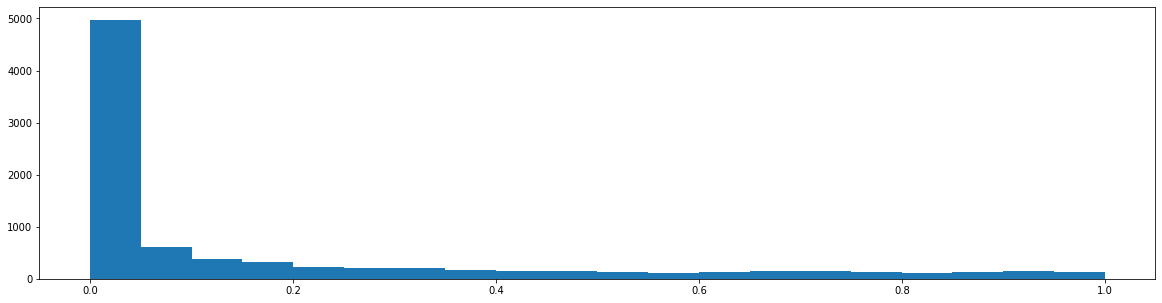

In [153]:
plt.figure(figsize=(20,5))
plt.hist(P_vals, bins=20)



(array([5110.,  713.,  534.,  407.,  349.,  315.,  274.,  354.,  327.,
         368.]),
 array([1.77641824e-42, 9.99829717e-02, 1.99965943e-01, 2.99948915e-01,
        3.99931887e-01, 4.99914859e-01, 5.99897830e-01, 6.99880802e-01,
        7.99863774e-01, 8.99846746e-01, 9.99829717e-01]),
 <a list of 10 Patch objects>)

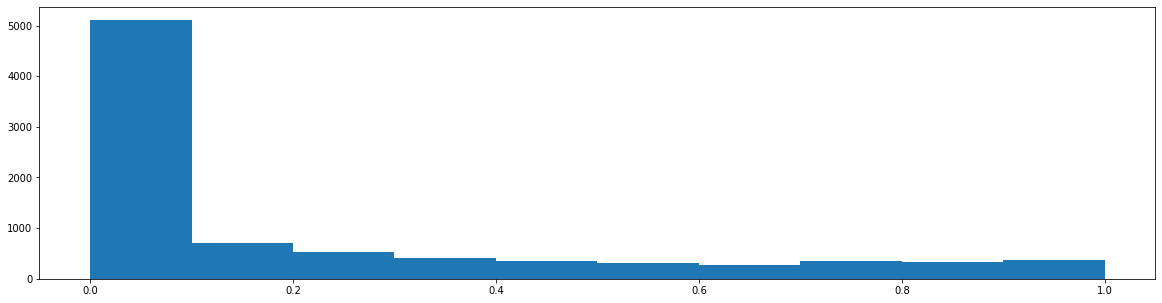

In [154]:
P_corrected = multipletests(P_vals, method = 'fdr_bh')
P_corrected
plt.figure(figsize=(20,5))
plt.hist(P_corrected[1])


In [155]:
np.count_nonzero(np.where(P_corrected[1]<=0.05))


4451

In [156]:
ind_new=[]
for c, ind in enumerate(indices):
    if P_corrected[1][c]<=0.05:
        ind_new.append(indices[c])
        

In [157]:
np.min(P_corrected[1])
np.shape(ind_new)


(4451, 2)

In [158]:
np.save('indices_with_ttest.npy', indices_with_ttest)


In [187]:
indices_ = np.copy(indices)
indices_with_ttest=[]
for ind in ind_new:
    data_stat_mp=0
    data_stat_nomp=0
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp= data_stat_mp + im_mp[ind[0]-10:ind[0]+10, ind[1]] 
        data_stat_nomp= data_stat_nomp + im_nomp[ind[0]-5:ind[0]+5, ind[1]] 
    FC = np.max(data_stat_mp)/np.max(data_stat_nomp)
    if FC>10:
        indices_with_ttest.append([ind[0],ind[1]])
        
    

In [188]:

np.shape(indices_with_ttest)


(318, 2)

In [922]:
# indices_with_ttest

In [1053]:
from scipy import stats
indices_ = np.copy(indices)
indices_with_ttest=[]
for ind in indices_:
    data_stat_mp=[]
    data_stat_nomp=[]
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp.append( np.mean(im_mp[ind[0]-12:ind[0]+12, ind[1]] ))
        data_stat_nomp.append( np.mean(im_nomp[ind[0]-12:ind[0]+12, ind[1]] ))
    t, p = stats.ttest_ind(data_stat_nomp,data_stat_mp)
    FC = np.max(data_stat_mp)/np.max(data_stat_nomp)
    if p<6.613347702022487e-03 :
        indices_with_ttest.append([ind[0],ind[1]])
    

In [1054]:
np.shape(indices_with_ttest)

(120, 2)

Multiple test_2

In [1296]:
from scipy import stats
indices_ = np.copy(indices)
indices_with_ttest=[]
data= []
for ind in indices_:
    P_vals =[]
    data_temp=[]
    data_temp_=[]
    for im_mp, im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_temp.append( np.max(im_mp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] )) 
        data_temp.append( np.max(im_nomp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] )) 
#     data_temp.append(data_temp_)
    data.append(data_temp)
#     data.append(data_temp_)
    
y= [1,1,1,1,1,0,0,0,0,0]
Data = np.reshape(data,np.size(data), order='F').reshape(np.shape(data)[1], np.shape(data)[0])
np.shape(Data)


(10, 8044)

In [1335]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFdr, chi2, f_classif
X=Data
y=y
X.shape
# (569, 30)
X_new = SelectFdr(chi2, alpha=0.05).fit_transform(X, y)
X_new.shape
# (569, 16)
X_new_anova= f_classif(X,y)
X_new_anova[0]



array([0.00187573, 0.34129604, 0.07882403, ..., 1.14550539, 0.87111638,
       0.79803772])

In [1290]:
np.shape(SelectFdr(chi2, alpha=0.05).fit(X,y).pvalues_)


(8044,)

In [1298]:
ind_new =[]
for count, i in enumerate(SelectFdr(chi2, alpha=0.05).fit(X,y).get_support()):
    if i == True:
        ind_new.append(indices[count])


In [1299]:
np.shape(ind_new)

(4755, 2)

In [1376]:
from scipy import stats
indices_ = np.copy(ind_new)
indices_with_ttest=[]
for ind in indices_:
    data_stat_mp=[]
    data_stat_nomp=[]
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp.append( np.max(im_mp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] ))
        data_stat_nomp.append( np.max(im_nomp[ind[0]-12:ind[0]+12, ind[1]-1:ind[1]+1] ))
    t, p = stats.ttest_ind(data_stat_nomp,data_stat_mp)
    FC = np.mean(data_stat_mp)/np.mean(data_stat_nomp)
    if (FC>5):
        indices_with_ttest.append([ind[0],ind[1]])

In [1377]:
np.shape(indices_with_ttest)

(222, 2)

In [185]:
def plot_spike_contrast_on_selected_features(ts,te, mz, ylim):

#     ts=int(ts*60)
#     te = int(te*60)
    
    mz = mz
#     rate = rate
#     plt.figure()
    fig , (ax1,ax2) = plt.subplots(1,2, figsize = ( 9,3))
    ax1.set_title('mz='+str((mz) +300)+ '(MP)')
    ax1.set(xlabel='RT', ylabel= 'Intensity')
#     ax1.ylabel('Intensity')
    ax1.set_ylim(top=ylim)
    
    xmin= ts#int(np.floor( ts/7 ))
    xmax= te#int(np.floor( te/7 ))
    
    for file in file_list:
        if (file.endswith('.npy')) and ('_MPrep' in file) :
            IM = np.load(os.path.join(filedir,file))
            ax1.plot(range(xmin,xmax),\
                 10000*Interpretation_importance[xmin:xmax,mz], 'blue')
            ax1.plot(range(xmin,xmax),\
                 IM[xmin:xmax,mz])

    #     plt.figure()
        elif (file.endswith('.npy')) and ('_noMP' in file):
            IM = np.load(os.path.join(filedir,file))
            
    
    
            ax2.set_title('mz='+str((mz) +300)+ '(noMP)')
            ax2.set(xlabel='RT', ylabel= 'Intensity')
        #     ax2.ylabel('Intensity')
            ax2.set_ylim(top=ylim)
            ax2.plot(range(xmin,xmax),\
                     10000*Interpretation_noMp_npy[xmin:xmax,mz], 'blue')
            ax2.plot(range(xmin,xmax),\
                     IM[xmin:xmax,mz])




In [41]:
indices[0]

(48, 255)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning,

<Figure size 432x288 with 0 Axes>

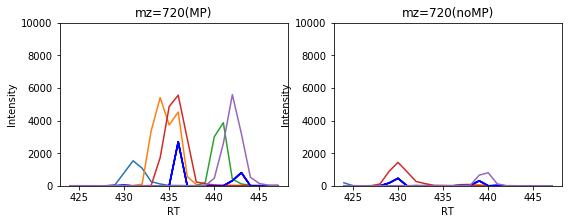

<Figure size 432x288 with 0 Axes>

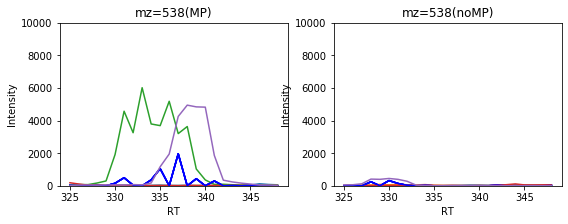

<Figure size 432x288 with 0 Axes>

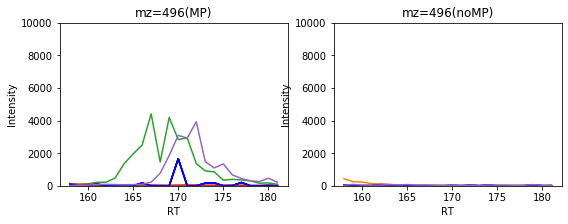

<Figure size 432x288 with 0 Axes>

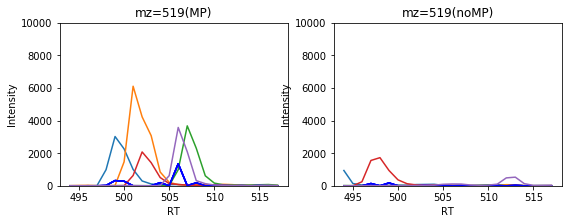

<Figure size 432x288 with 0 Axes>

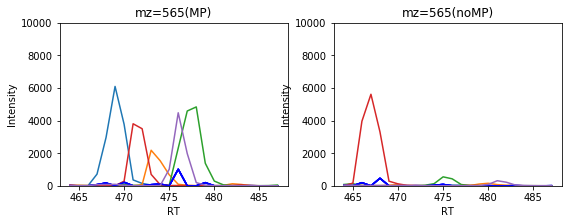

<Figure size 432x288 with 0 Axes>

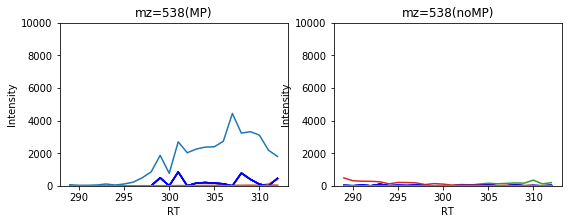

<Figure size 432x288 with 0 Axes>

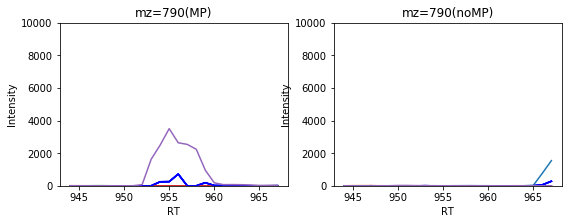

<Figure size 432x288 with 0 Axes>

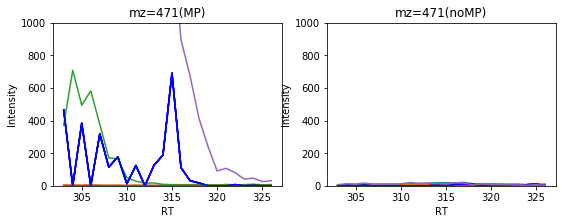

<Figure size 432x288 with 0 Axes>

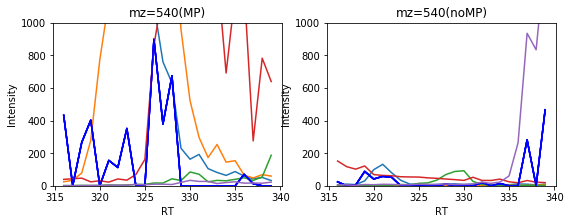

<Figure size 432x288 with 0 Axes>

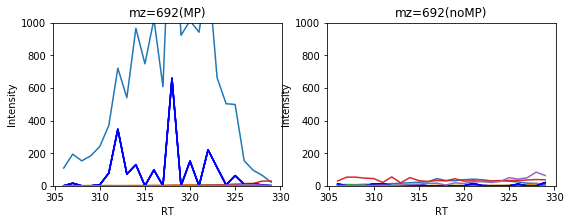

<Figure size 432x288 with 0 Axes>

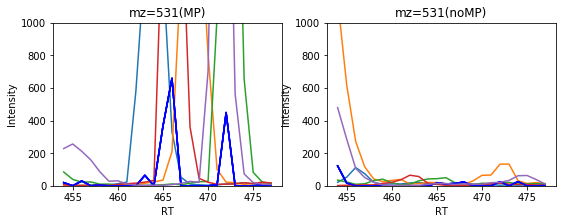

<Figure size 432x288 with 0 Axes>

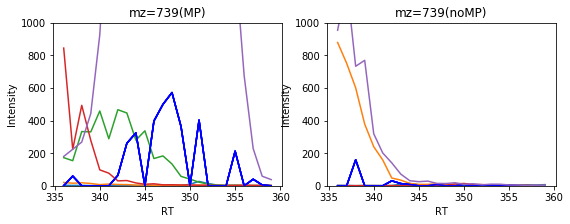

<Figure size 432x288 with 0 Axes>

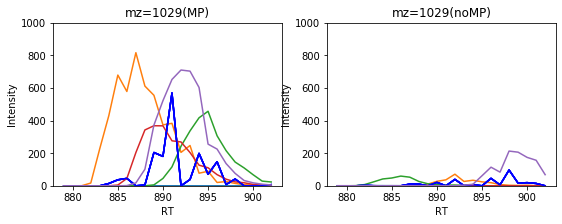

<Figure size 432x288 with 0 Axes>

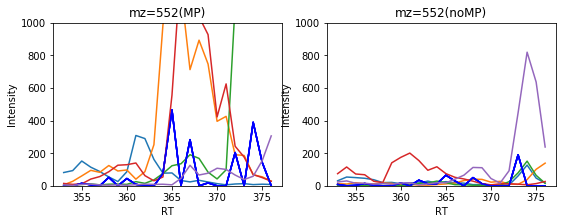

<Figure size 432x288 with 0 Axes>

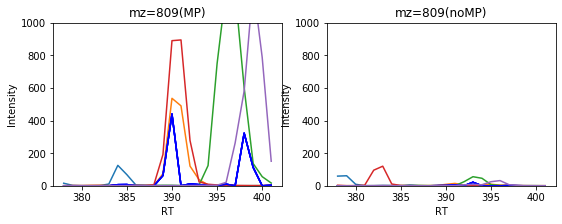

<Figure size 432x288 with 0 Axes>

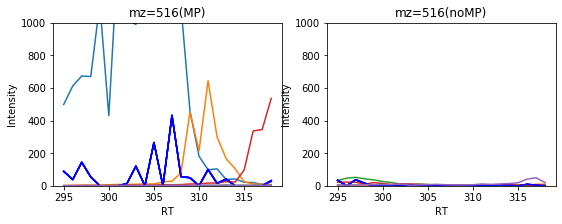

In [186]:
indices_ = indices_with_ttest
plt.figure()
plot_spike_contrast_on_selected_features(indices_[0][0]-12, indices_[0][0]+12,\
                                         mz=indices_[0][1], ylim= 10000)
plt.figure()
plot_spike_contrast_on_selected_features(indices_[1][0]-12, indices_[1][0]+12,\
                                         mz=indices_[1][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[2][0]-12, indices_[2][0]+12,\
                                         mz=indices_[2][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[3][0]-12, indices_[3][0]+12,\
                                         mz=indices_[3][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[4][0]-12, indices_[4][0]+12,\
                                         mz=indices_[4][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[5][0]-12, indices_[5][0]+12,\
                                         mz=indices_[5][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[6][0]-12, indices_[6][0]+12,\
                                         mz=indices_[6][1], ylim= 10000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[7][0]-12, indices_[7][0]+12,\
                                         mz=indices_[7][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[8][0]-12, indices_[8][0]+12,\
                                         mz=indices_[8][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[9][0]-12, indices_[9][0]+12,\
                                         mz=indices_[9][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[10][0]-12, indices_[10][0]+12,\
                                         mz=indices_[10][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[11][0]-12, indices_[11][0]+12,\
                                         mz=indices_[11][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[12][0]-12, indices_[12][0]+12,\
                                         mz=indices_[12][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[13][0]-12, indices_[13][0]+12,\
                                         mz=indices_[13][1], ylim= 1000)


plt.figure()
plot_spike_contrast_on_selected_features(indices_[14][0]-12, indices_[14][0]+12,\
                                         mz=indices_[14][1], ylim= 1000)

plt.figure()
plot_spike_contrast_on_selected_features(indices_[15][0]-12, indices_[15][0]+12,\
                                         mz=indices_[15][1], ylim= 1000)




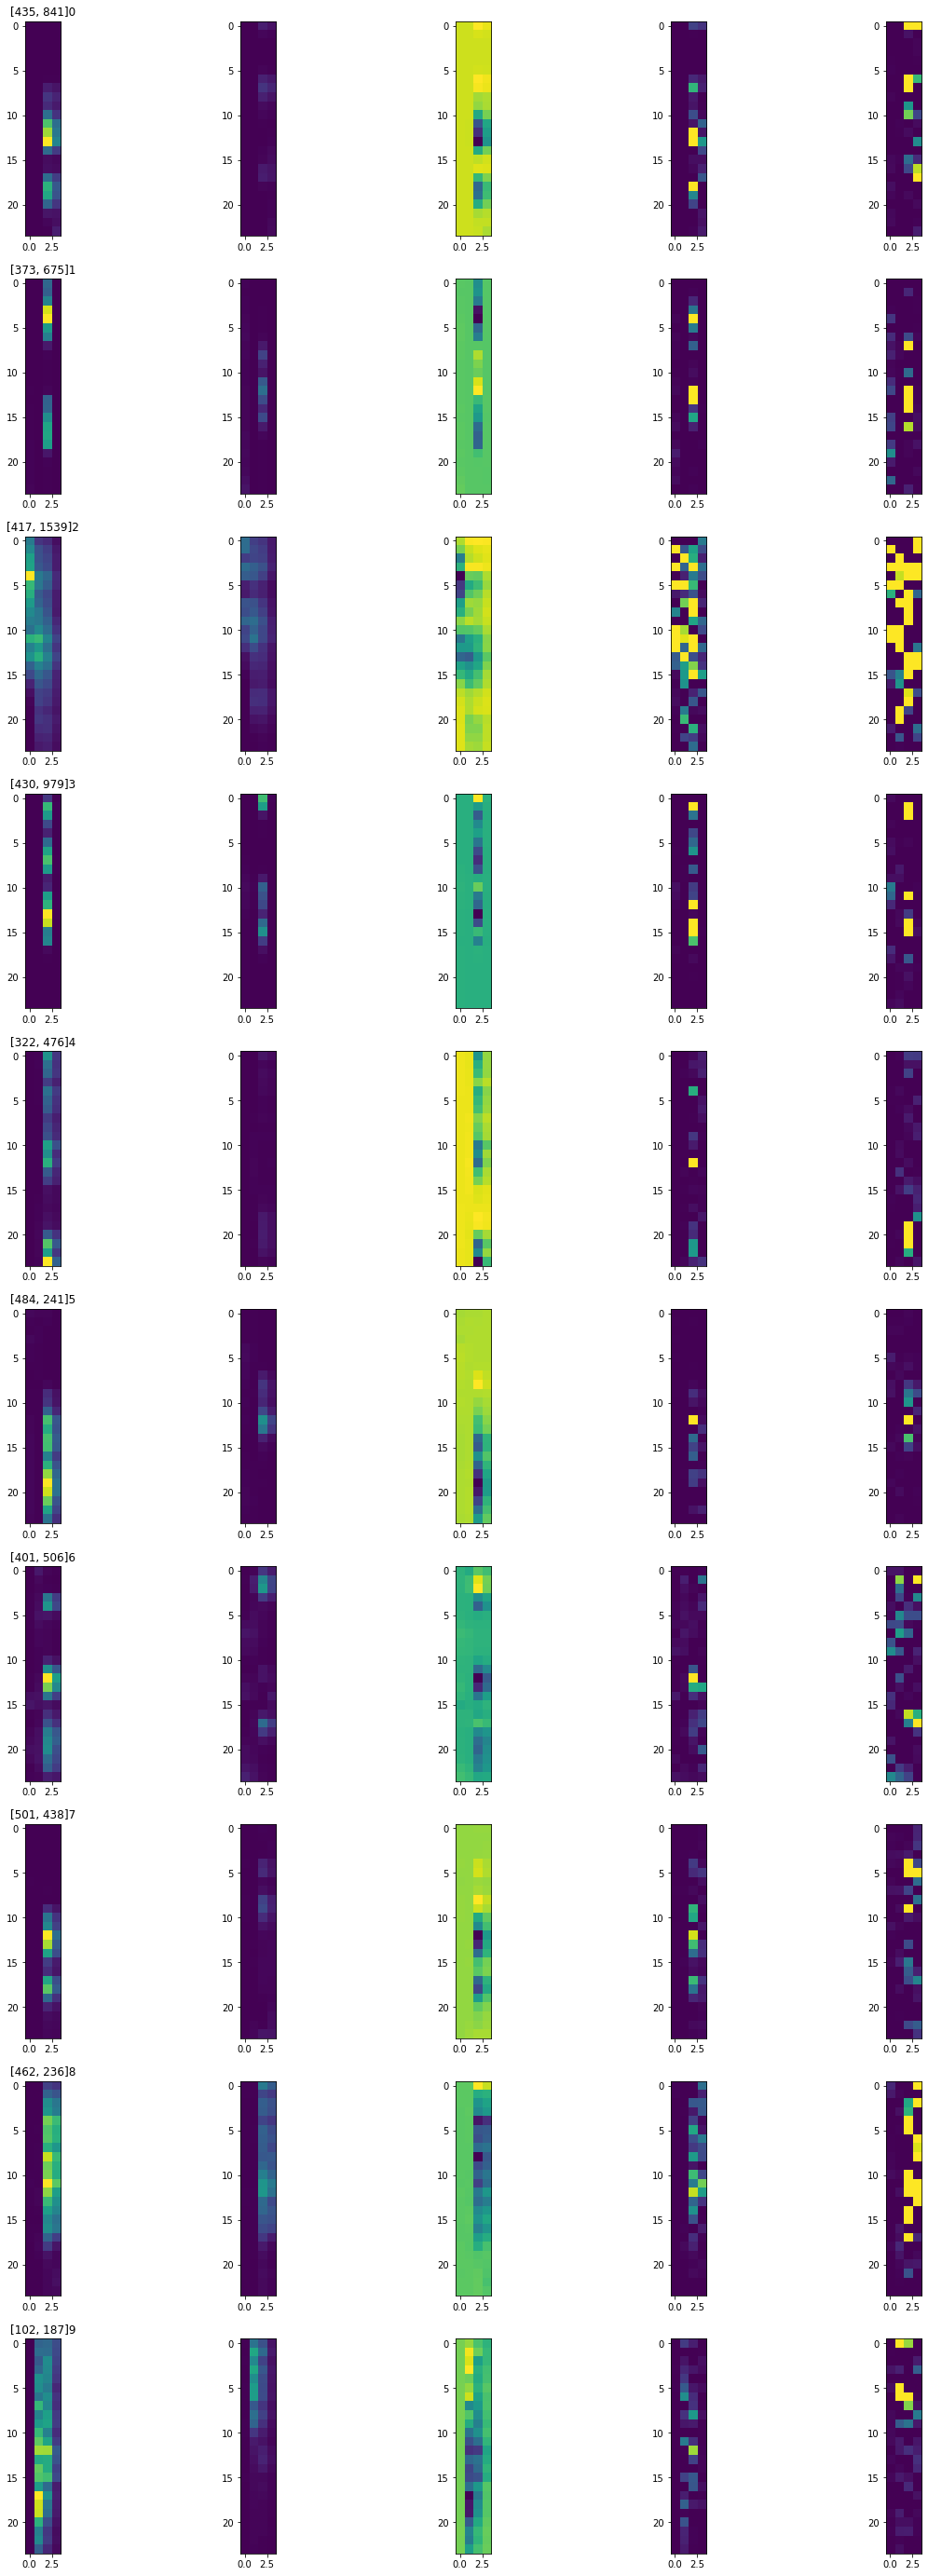

In [274]:
indice_check=indices_with_ttest
f, axs = plt.subplots(10,5,figsize=(20,50))
for i in range(10):
# f, axs = plt.subplots(2,5,figsize=(20,10))
# for i in range(2):
    
    axs[i,0].set_title(str(indice_check[i])+str(i))
    max_value= np.max([test_image_noMp[ indice_check[i][0]-12:indice_check[i][0]+12, \
                                             indice_check[i][1]-2:indice_check[i][1]+2 ],\
                       test_image_Mp[ indice_check[i][0]-12:indice_check[i][0]+12, \
                                             indice_check[i][1]-2:indice_check[i][1]+2 ], 
                       ])

    min_value = np.min([test_image_noMp[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                              indice_check[i][1]-2:indice_check[i][1]+2 ],
                       test_image_Mp[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                             indice_check[i][1]-2:indice_check[i][1]+2 ], 
                       ])

    axs[i,0].imshow(test_image_Mp[ indice_check[i][0]-12:indice_check[i][0]+12, \
                                          indice_check[i][1]-2:indice_check[i][1]+2 ],\
                                            vmin=min_value, vmax=max_value)
#     axs[i,0].set_title('disease sample around the most important variable')
    axs[i,1].imshow(test_image_noMp[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                          indice_check[i][1]-2:indice_check[i][1]+2 ], \
                                            vmin=min_value, vmax=max_value)
#     axs[i,1].set_title('healthy sample around the most important variable')
    axs[i,2].imshow(test_image_noMp[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                              indice_check[i][1]-2:indice_check[i][1]+2 ]-\
                       test_image_Mp[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                             indice_check[i][1]-2:indice_check[i][1]+2 ] )
    
    axs[i,3].imshow(Interpretation_Mp_npy[ indice_check[i][0]-12:indice_check[i][0]+12, \
                                         indice_check[i][1]-2:indice_check[i][1]+2 ], \
                                        vmin=0, vmax=0.1)
    axs[i,4].imshow(Interpretation_noMp_npy[ indice_check[i][0]-12:indice_check[i][0]+12,\
                                         indice_check[i][1]-2:indice_check[i][1]+2 ], \
                                        vmin=0, vmax=0.01)
    
#     count, bins = np.histogram((test_image_Mp[ indice_check[i][0]-12:indice_check[i][0]+12, indice_check[i][1]-2:indice_check[i][1]+2 ]))
#     axs[i,5].hist(bins[1:-1], bins=100, weights=count[1:])

#     count_, bins_ = np.histogram((test_image_noMp[ indice_check[i][0]-12:indice_check[i][0]+12, indice_check[i][1]-2:indice_check[i][1]+2 ]))
#     axs[i,6].hist(bins_[1:-1], bins=100, weights=count_[1:])

In [2]:
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import pyopenms
from skimage import util
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [3]:
#read the interpretation and corresponding image
def read_image(file, path_image):
    image = io.imread(os.path.join(path_image,file ))
    image = util.invert(image)
    image= image.astype('float')/255
    return  image


In [4]:
def read_npy(file, path_image):
    image= np.load(os.path.join(path_image,file ))
    return  image



In [10]:
#original npy image
test_image_png = '/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/spike-in/npy/'

filelist_png_1= [file for file in os.listdir(test_image_png)]# if \
#                  ('22_MS' in file) ]
# filelist_png_2= [file for file in os.listdir(test_image_png) if \
#                  ('20_MS' in file) ]

n_file_1 = len(filelist_png_1)
# n_file_2 = len(filelist_png_2)

mean_image_1=np.zeros((1142,2000),np.float)
#mean_image_2=np.zeros((1000,4000),np.float)

for file_1 in filelist_png_1:
    image_1  = read_npy(file_1, test_image_png )
    mean_image_1 = mean_image_1 + np.abs(image_1)/n_file_1
    
    

In [11]:
np.save('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/\
mzml/TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/mean_spike_in.npy',mean_image_1)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFdr, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape
# (569, 30)
X_new = SelectFdr(chi2, alpha=0.01).fit_transform(X, y)
X_new.shape
# (569, 16)